In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv(r'C:\Users\USER\Desktop\Supermarket_Sales\data\external\Sales.csv')
data.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2021,10:29,Cash,76.40,4.761905,3.8200,9.6
1,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2021,13:23,Credit card,324.31,4.761905,16.2155,7.4
2,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2021,20:33,Ewallet,465.76,4.761905,23.2880,8.4
3,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2021,10:37,Ewallet,604.17,4.761905,30.2085,5.3
4,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2021,18:30,Ewallet,597.73,4.761905,29.8865,4.1


In [3]:
data.shape

(999, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Invoice ID                999 non-null    object 
 1   Branch                    999 non-null    object 
 2   City                      999 non-null    object 
 3   Customer_type             999 non-null    object 
 4   Gender                    999 non-null    object 
 5   Product line              999 non-null    object 
 6   Unit price                999 non-null    float64
 7   Quantity                  999 non-null    int64  
 8   Tax 5%                    999 non-null    float64
 9   Total                     999 non-null    float64
 10  Date                      999 non-null    object 
 11  Time                      999 non-null    object 
 12  Payment                   999 non-null    object 
 13  cogs                      999 non-null    float64
 14  gross marg

In [5]:
data.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer_type               0
Gender                      0
Product line                0
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Unit price,999.0,55.653093,2.650106e+01,10.080000,32.850000,55.070000,77.940000,99.960000
Quantity,999.0,5.508509,2.924514e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,999.0,15.368596,1.170973e+01,0.508500,5.894750,12.080000,22.429000,49.650000
Total,999.0,322.740518,2.459043e+02,10.678500,123.789750,253.680000,471.009000,1042.650000
cogs,999.0,307.371922,2.341946e+02,10.170000,117.895000,241.600000,448.580000,993.000000
gross margin percentage,999.0,4.761905,8.886233e-16,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,999.0,15.368596,1.170973e+01,0.508500,5.894750,12.080000,22.429000,49.650000
Rating,999.0,6.970571,1.718121e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [8]:
data = data.rename(columns={'Invoice ID' : 'Invoice_ID', 'Product line': 'Product_Line', 'Unit price': 'Unit_Price','Tax 5%': 'Tax_5%', 'gross margin percentage ': 'Gross_Margin_Percentage', 'gross income': 'Gross_Income'})

In [9]:
data.columns.tolist()

['Invoice_ID',
 'Branch',
 'City',
 'Customer_type',
 'Gender',
 'Product_Line',
 'Unit_Price',
 'Quantity',
 'Tax_5%',
 'Total',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'Gross_Margin_Percentage',
 'Gross_Income',
 'Rating']

In [10]:
data.nunique()

Invoice_ID                 999
Branch                       3
City                         3
Customer_type                2
Gender                       2
Product_Line                 6
Unit_Price                 942
Quantity                    10
Tax_5%                     989
Total                      989
Date                        89
Time                       506
Payment                      3
cogs                       989
Gross_Margin_Percentage      1
Gross_Income               989
Rating                      61
dtype: int64

UNIVARIATE ANALYSIS

In [11]:
def univariate_analysis(df):
    save_dir = 'reports/figures'
    os.makedirs(save_dir, exist_ok=True)
    for col in df.columns:
        print(f'Column: {col}')
        print(df[col].describe())
        if df[col].dtype == 'object':
            print('Value counts')
            print(df[col].value_counts())
            df[col].value_counts().plot(kind = 'bar')
            plt.title(f'Bar plot of {col}')
            plt.savefig(f'{save_dir}/{col}_bar.png')
            plt.show()
        else:
            df[col].hist(bins = 20)
            plt.title(f'Histgram of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.savefig(f'{save_dir}/{col}_hist.png')
            plt.show()


Column: Invoice_ID
count             999
unique            999
top       849-09-3807
freq                1
Name: Invoice_ID, dtype: object
Value counts
Invoice_ID
849-09-3807    1
226-31-3081    1
631-41-3108    1
123-19-1176    1
373-73-7910    1
              ..
365-64-0515    1
529-56-3974    1
351-62-0822    1
692-92-5582    1
665-32-9167    1
Name: count, Length: 999, dtype: int64


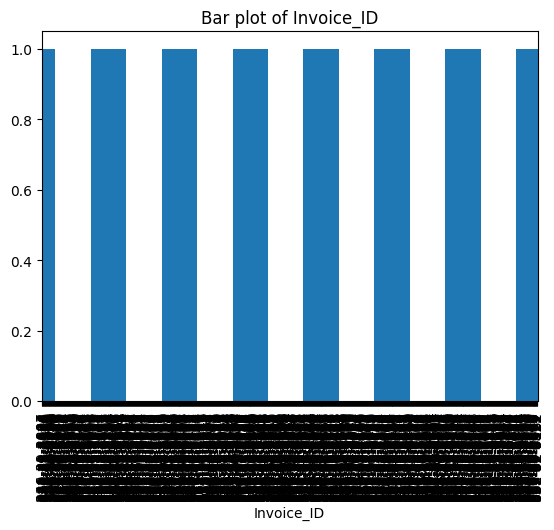

Column: Branch
count     999
unique      3
top         A
freq      339
Name: Branch, dtype: object
Value counts
Branch
A    339
B    332
C    328
Name: count, dtype: int64


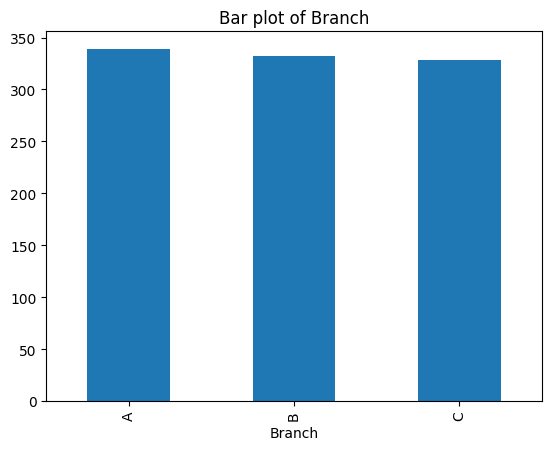

Column: City
count        999
unique         3
top       Yangon
freq         339
Name: City, dtype: object
Value counts
City
Yangon       339
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64


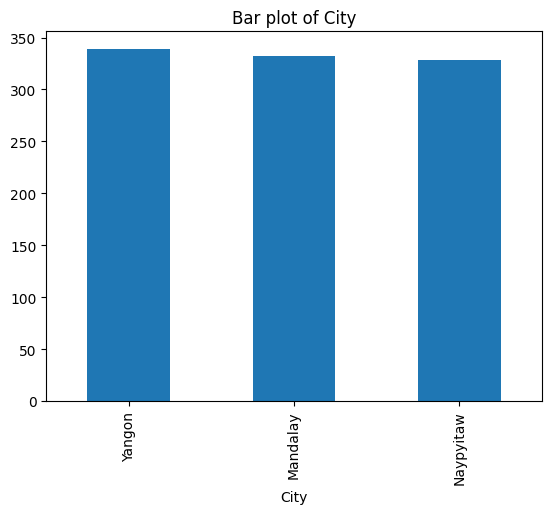

Column: Customer_type
count        999
unique         2
top       Member
freq         500
Name: Customer_type, dtype: object
Value counts
Customer_type
Member    500
Normal    499
Name: count, dtype: int64


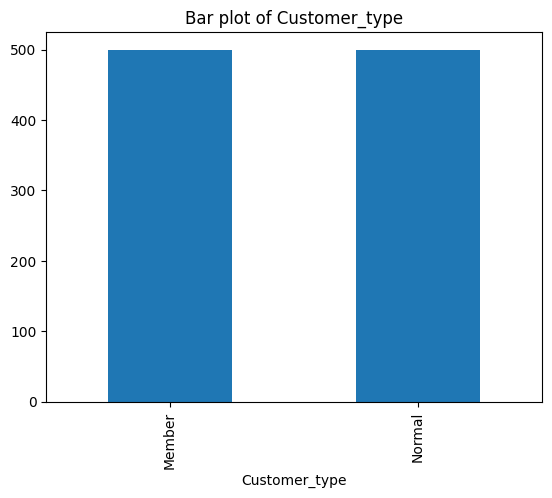

Column: Gender
count        999
unique         2
top       Female
freq         500
Name: Gender, dtype: object
Value counts
Gender
Female    500
Male      499
Name: count, dtype: int64


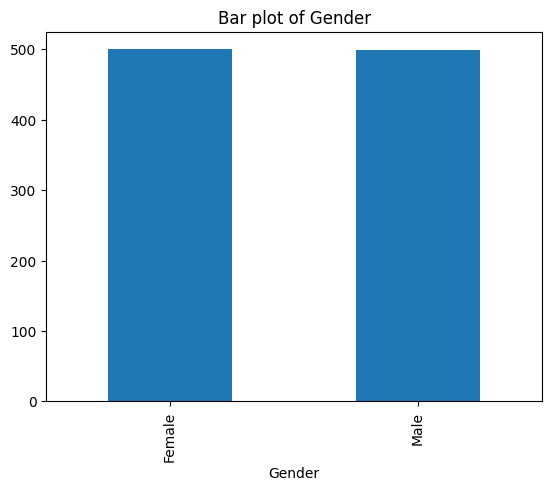

Column: Product_Line
count                     999
unique                      6
top       Fashion accessories
freq                      178
Name: Product_Line, dtype: object
Value counts
Product_Line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         151
Name: count, dtype: int64


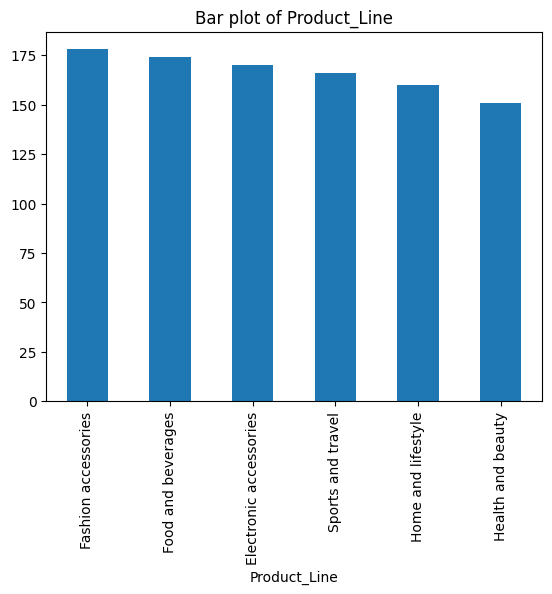

Column: Unit_Price
count    999.000000
mean      55.653093
std       26.501055
min       10.080000
25%       32.850000
50%       55.070000
75%       77.940000
max       99.960000
Name: Unit_Price, dtype: float64


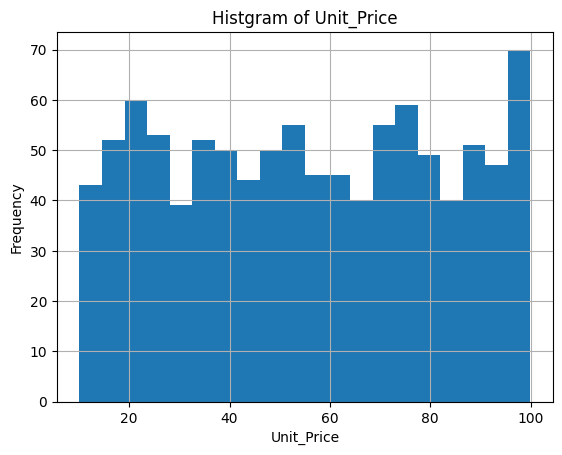

Column: Quantity
count    999.000000
mean       5.508509
std        2.924514
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Quantity, dtype: float64


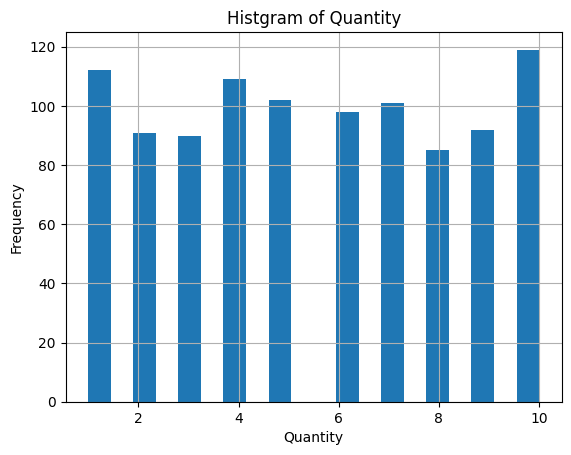

Column: Tax_5%
count    999.000000
mean      15.368596
std       11.709731
min        0.508500
25%        5.894750
50%       12.080000
75%       22.429000
max       49.650000
Name: Tax_5%, dtype: float64


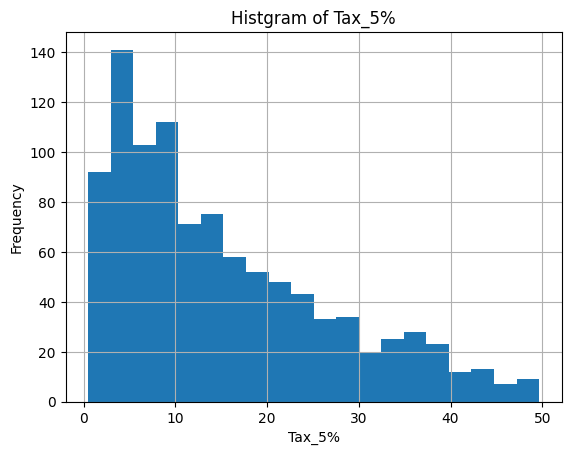

Column: Total
count     999.000000
mean      322.740518
std       245.904345
min        10.678500
25%       123.789750
50%       253.680000
75%       471.009000
max      1042.650000
Name: Total, dtype: float64


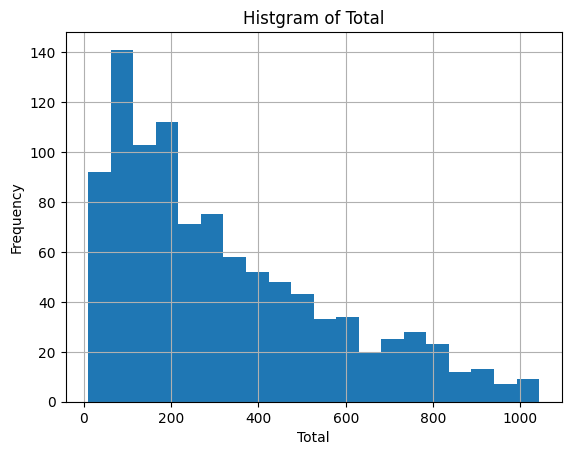

Column: Date
count          999
unique          89
top       2/7/2021
freq            20
Name: Date, dtype: object
Value counts
Date
2/7/2021     20
2/15/2021    19
3/2/2021     18
1/8/2021     18
3/14/2021    18
             ..
2/1/2021      6
1/4/2021      6
3/21/2021     6
2/21/2021     6
3/17/2021     6
Name: count, Length: 89, dtype: int64


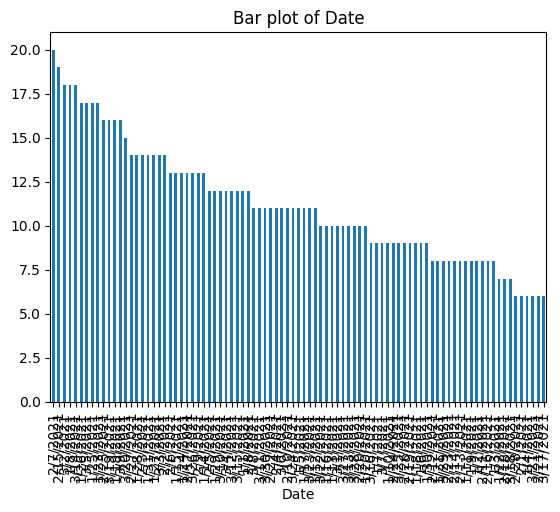

Column: Time
count       999
unique      506
top       19:48
freq          7
Name: Time, dtype: object
Value counts
Time
19:48    7
14:42    7
17:38    6
17:36    5
19:39    5
        ..
16:27    1
15:23    1
18:18    1
15:17    1
19:12    1
Name: count, Length: 506, dtype: int64


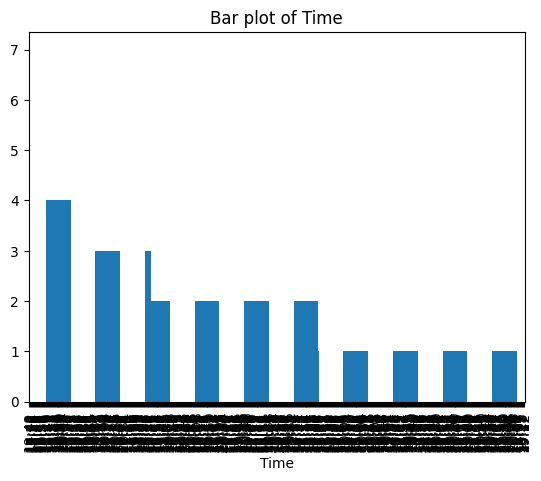

Column: Payment
count      999
unique       3
top       Cash
freq       344
Name: Payment, dtype: object
Value counts
Payment
Cash           344
Ewallet        344
Credit card    311
Name: count, dtype: int64


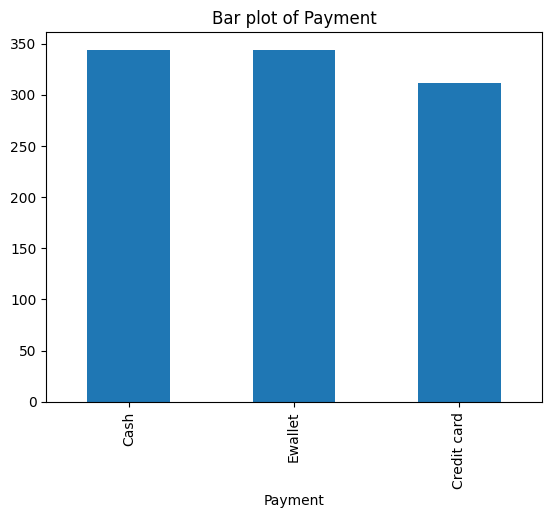

Column: cogs
count    999.000000
mean     307.371922
std      234.194615
min       10.170000
25%      117.895000
50%      241.600000
75%      448.580000
max      993.000000
Name: cogs, dtype: float64


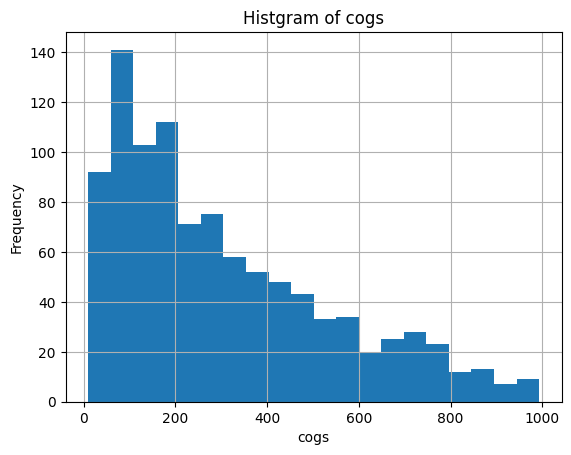

Column: Gross_Margin_Percentage
count    9.990000e+02
mean     4.761905e+00
std      8.886233e-16
min      4.761905e+00
25%      4.761905e+00
50%      4.761905e+00
75%      4.761905e+00
max      4.761905e+00
Name: Gross_Margin_Percentage, dtype: float64


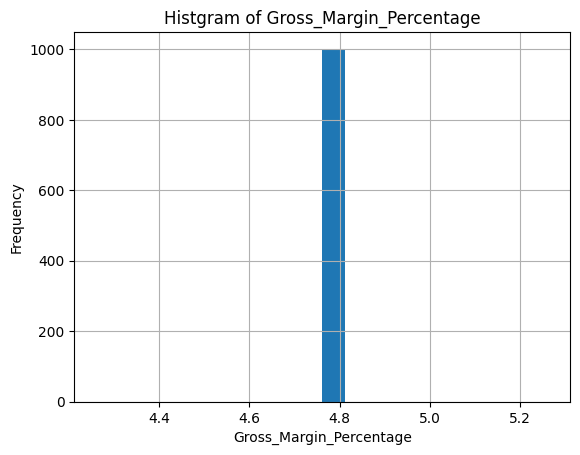

Column: Gross_Income
count    999.000000
mean      15.368596
std       11.709731
min        0.508500
25%        5.894750
50%       12.080000
75%       22.429000
max       49.650000
Name: Gross_Income, dtype: float64


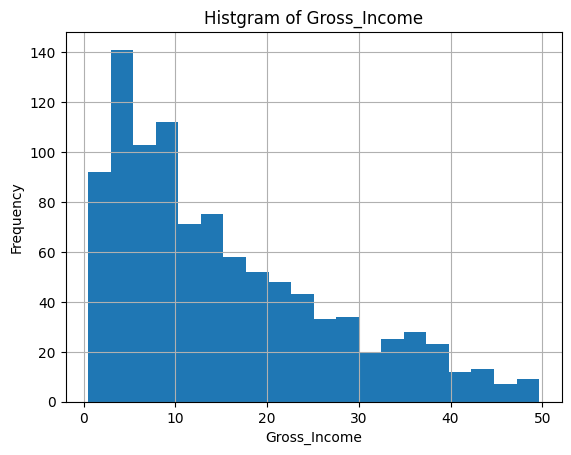

Column: Rating
count    999.000000
mean       6.970571
std        1.718121
min        4.000000
25%        5.500000
50%        7.000000
75%        8.500000
max       10.000000
Name: Rating, dtype: float64


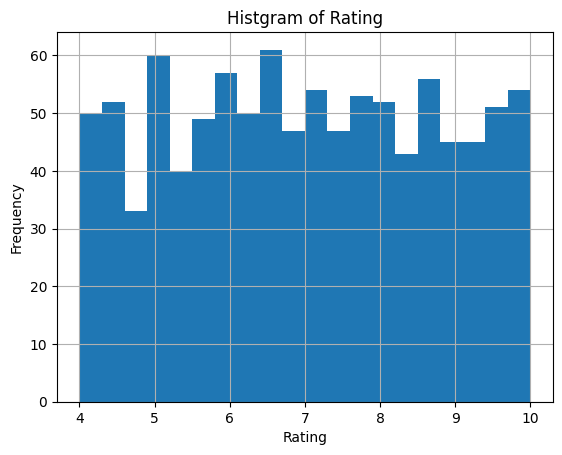

In [12]:
univariate_analysis(data)

Remember that in python an object is a data type used for colums that contain tect(strings) or mixed data types


In [13]:
Categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
print('Categorical columns:',Categorical_cols)

Numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
print('Numerical columns:',Numerical_cols)

Categorical columns: ['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender', 'Product_Line', 'Date', 'Time', 'Payment']
Numerical columns: ['Unit_Price', 'Quantity', 'Tax_5%', 'Total', 'cogs', 'Gross_Margin_Percentage', 'Gross_Income', 'Rating']


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\USER\\Desktop\\Supermarket_Sales\\reports\\figures\\correlation_matrix.png'

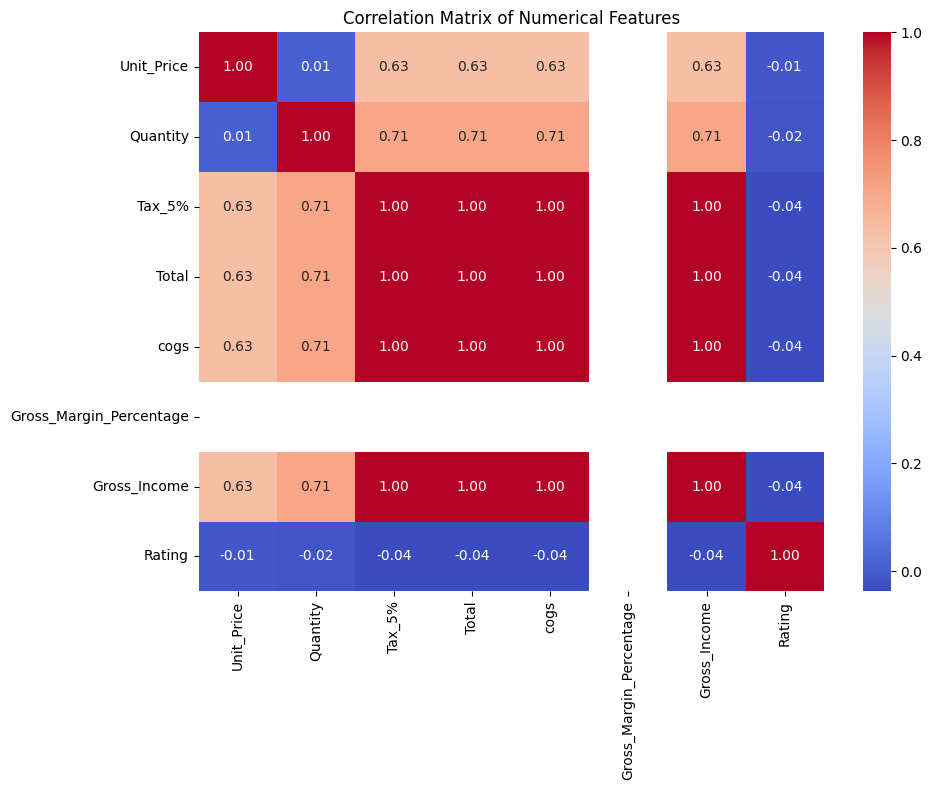

In [14]:
save_dir = r'C:\Users\USER\Desktop\Supermarket_Sales\reports\figures'
corr_matrix = data[Numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.savefig(fr"{save_dir}\correlation_matrix.png")
plt.show()

In [ ]:
def bivariate_analysis(df, col1, col2):
    save_dir = r'C:\Users\USER\Desktop\Supermarket_Sales\reports\figures'
    if df[col1].dtype != 'object' and df[col2].dtype != 'object':
        #numerical vs numerical data, here we can use a scatter plot
        plt.scatter(df[col1], df[col2])
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.title(f'Scatter plot of {col1} vs {col2}')
        plt.savefig(f'{save_dir}/{col1}_vs_{col2}_scatter.png')
        plt.show()
        #categorical vs numerical
    elif df[col1].dtype == 'object' and df[col2].dtype != 'object':
        sns.boxplot(x=col1, y=col2, data = df)
        plt.title(f'Boxplot of {col1} vs {col2}')
        plt.savefig(f'{save_dir}/{col1}_vs_{col2}_boxplot.png')
        plt.show()
        #numerical vs categorical which means that the first column is not an object
    elif df[col1].dtype != 'object' and df[col2].dtype == 'object':
        sns.boxplot(x=col1, y=col2, data = df)
        plt.title(f'Boxplot of {col1} by {col2}')
        plt.savefig(f'{save_dir}/{col1}_vs_{col2}_boxplot.png')
        plt.show()
    else:
        #Categorical vs categorical
        sns.countplot(x=col1, hue=col2, data=df)
        plt.title(f'Countplot of {col1} by {col2}')
        plt.savefig(f'{save_dir}/{col1}_vs_{col2}_countplot.png')
        plt.show()


In [ ]:
pairs = [
    ('Branch', 'Unit_Price'), ('Branch', 'Quantity'), ('Branch', 'Tax_5%'), ('Branch', 'Total'), ('Branch', 'cogs'), ('Branch', 'Gross_Income'), ('Branch', 'Rating'),
    ('City', 'Unit_Price'), ('City', 'Quantity'), ('City', 'Tax_5%'), ('City', 'Total'), ('City', 'cogs'), ('City', 'Gross_Income'), ('City', 'Rating'),
    ('Customer_type', 'Unit_Price'), ('Customer_type', 'Quantity'), ('Customer_type', 'Tax_5%'), ('Customer_type', 'Total'), ('Customer_type', 'cogs'),('Customer_type', 'Gross_Income'), ('Customer_type', 'Rating'),
    ('Gender', 'Unit_Price'), ('Gender', 'Quantity'), ('Gender', 'Tax_5%'), ('Gender', 'Total'), ('Gender', 'cogs'), ('Gender', 'Gross_Income'), ('Gender', 'Rating'),
    ('Product_Line', 'Unit_Price'), ('Product_Line', 'Quantity'), ('Product_Line', 'Tax_5%'), ('Product_Line', 'Total'), ('Product_Line', 'cogs'), ('Product_Line', 'Gross_Income'), ('Product_Line', 'Rating'),
    ('Payment', 'Unit_Price'), ('Payment', 'Quantity'), ('Payment', 'Tax_5%'), ('Payment', 'Total'), ('Payment', 'cogs'), ('Payment', 'Gross_Income'), ('Payment', 'Rating')
]

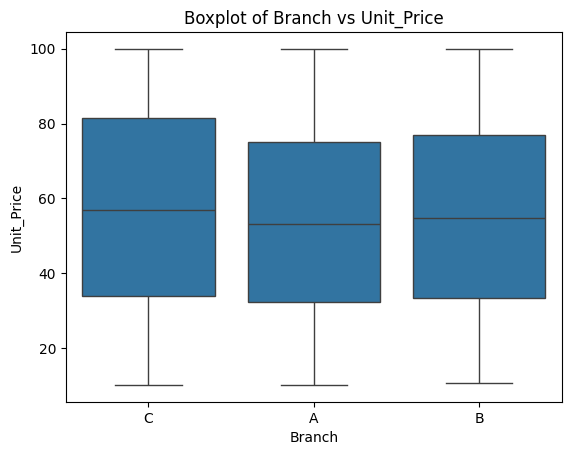

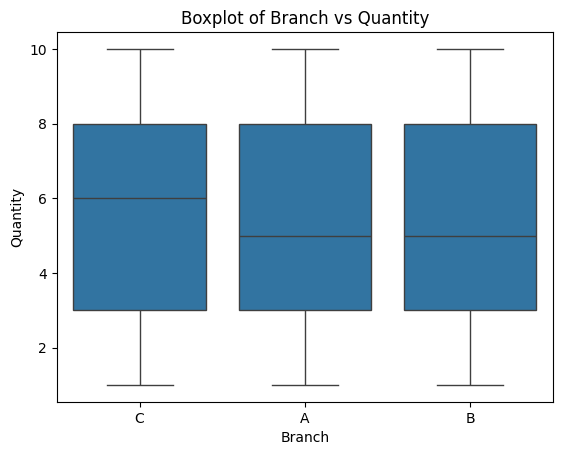

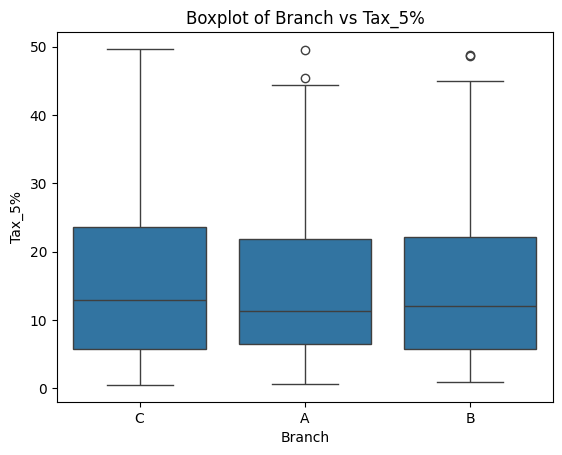

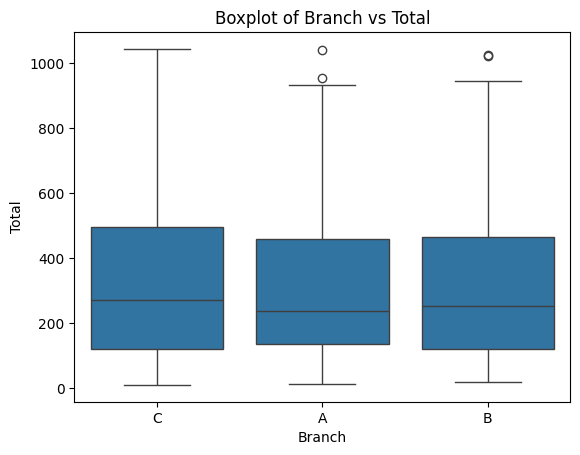

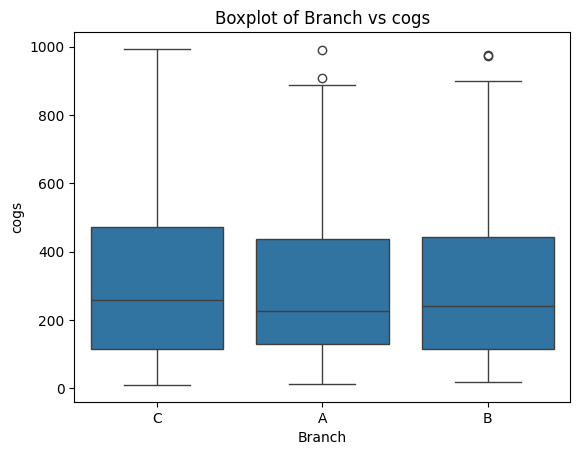

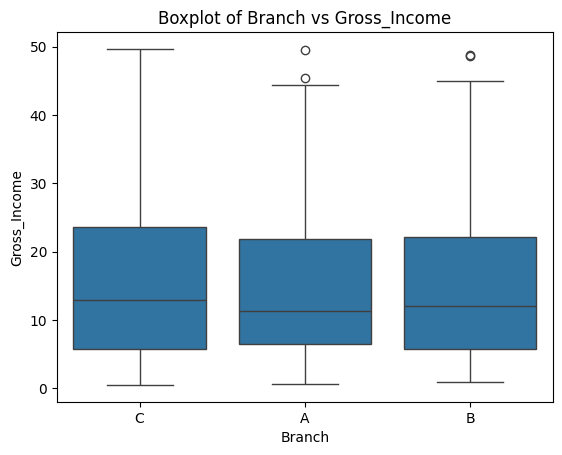

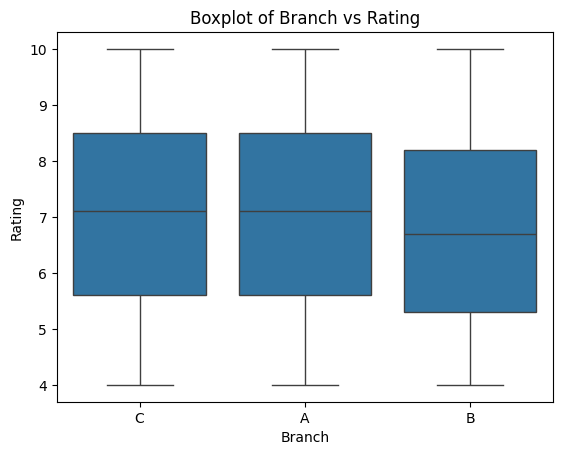

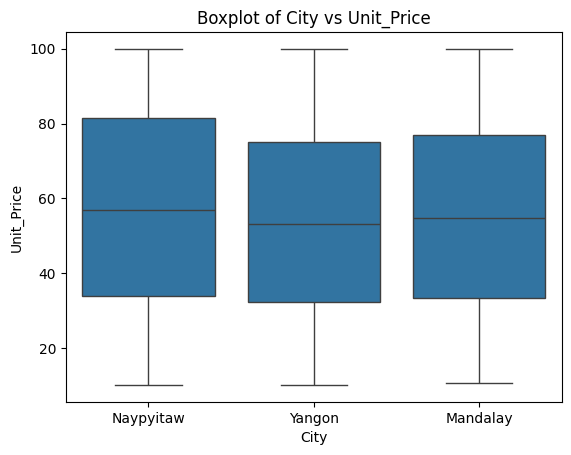

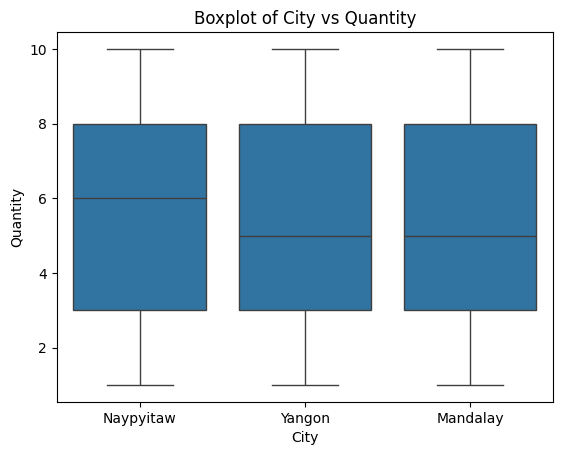

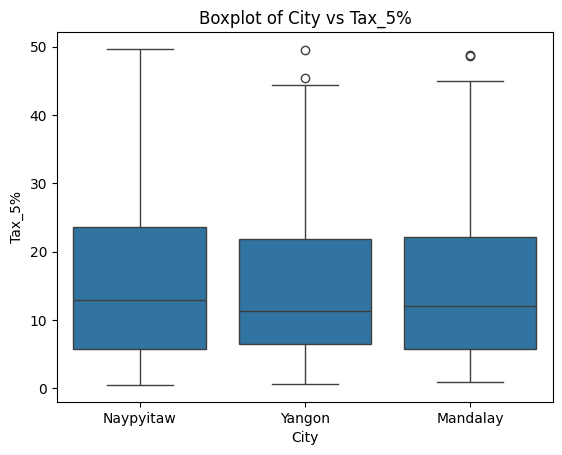

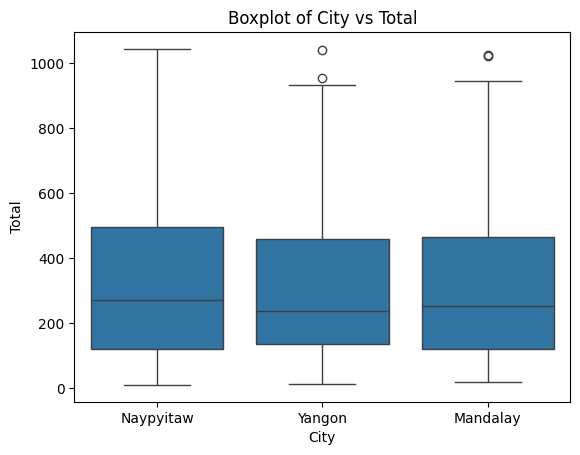

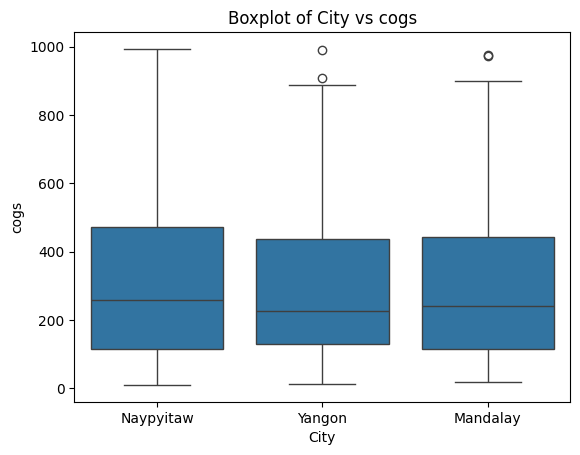

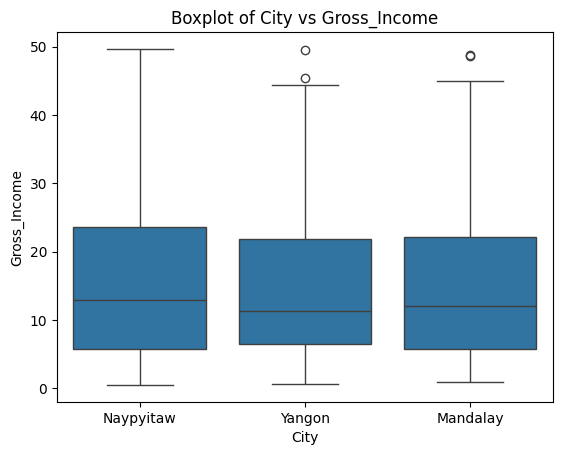

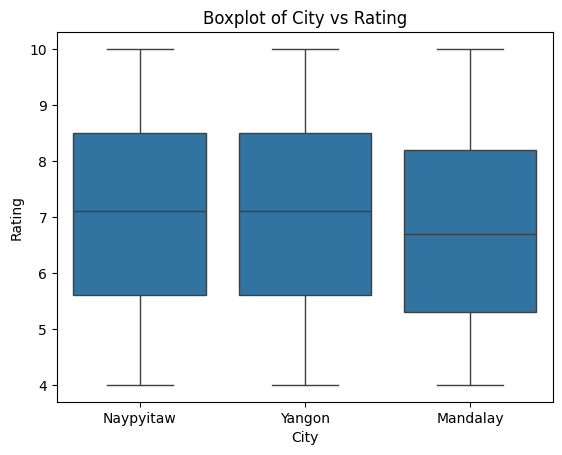

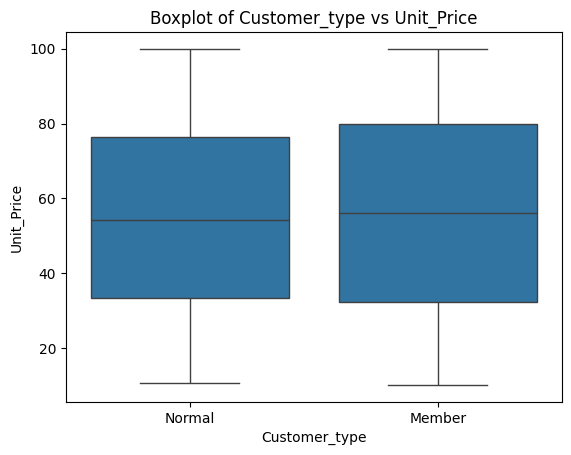

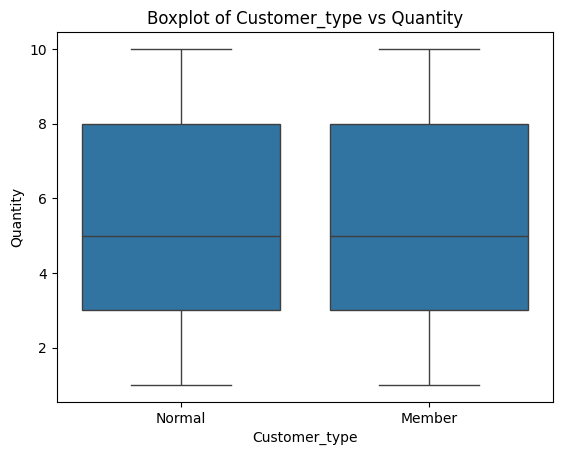

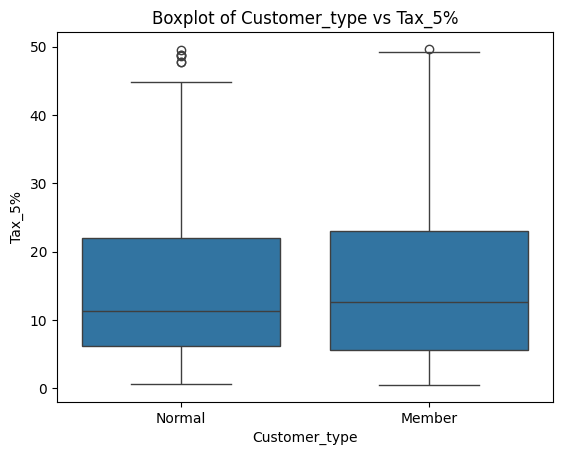

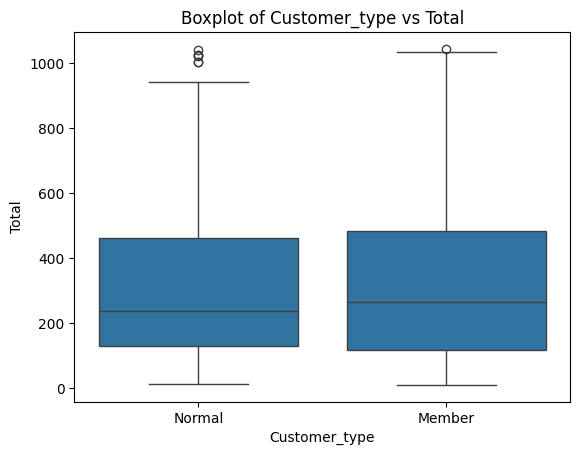

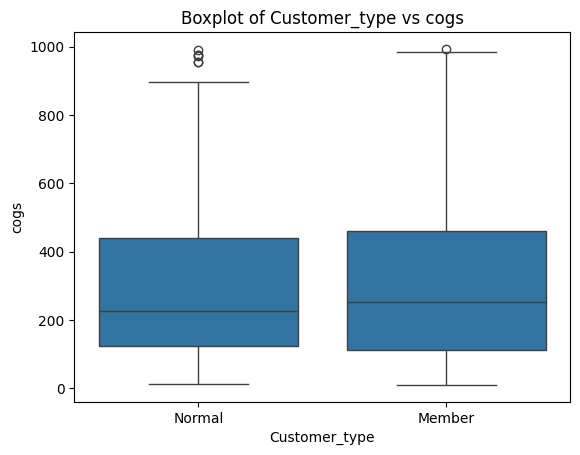

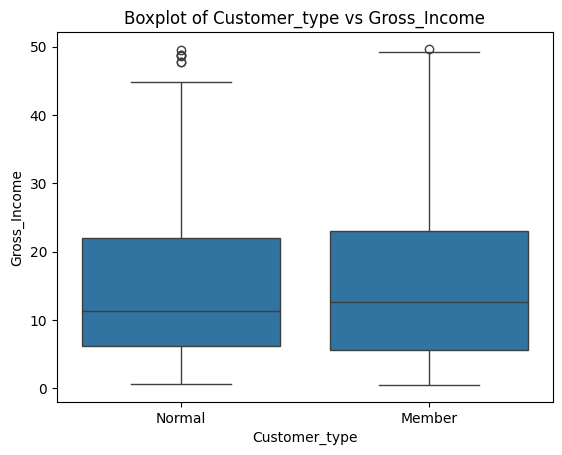

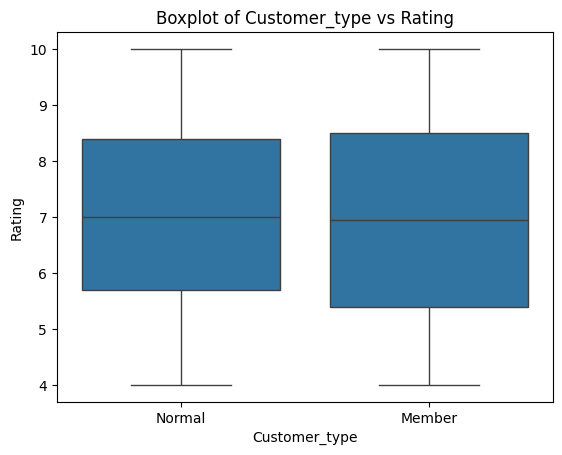

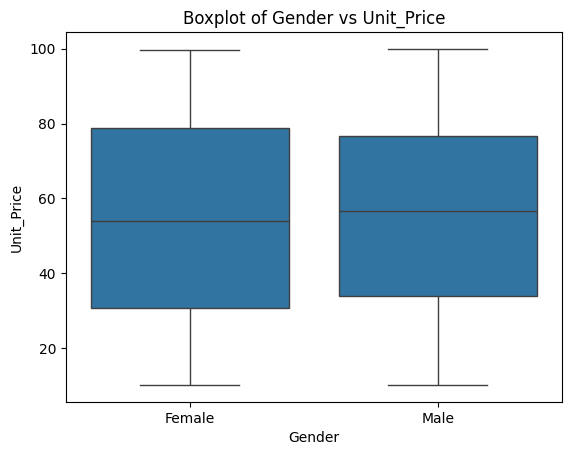

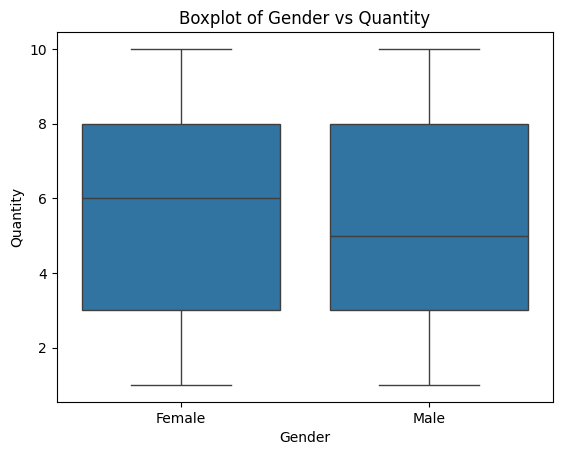

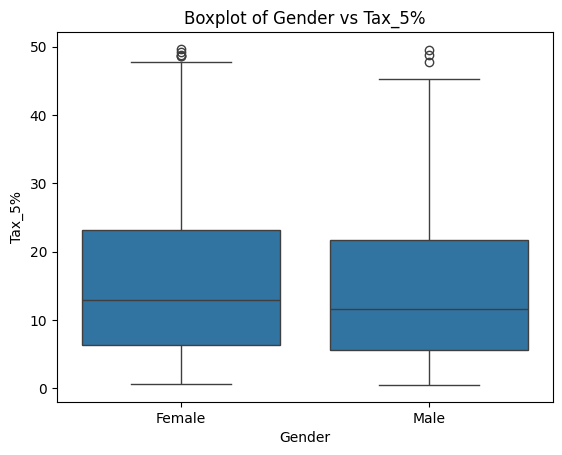

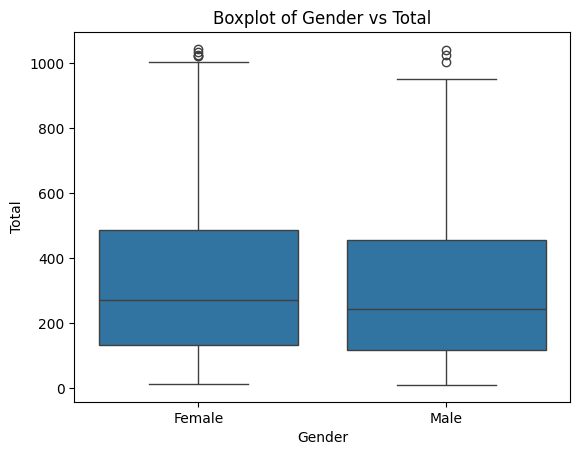

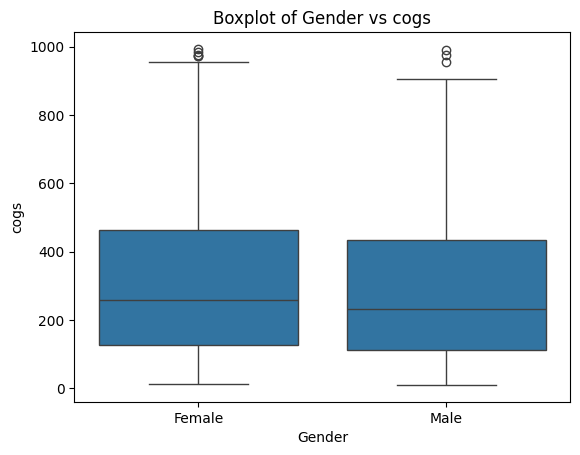

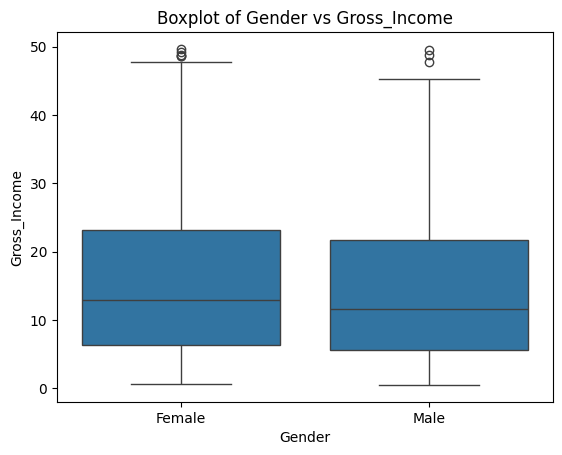

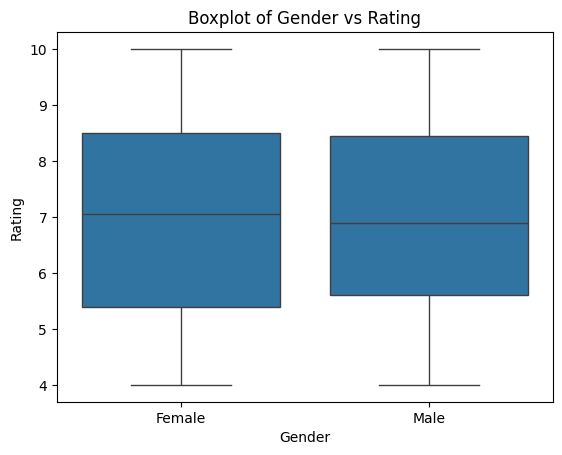

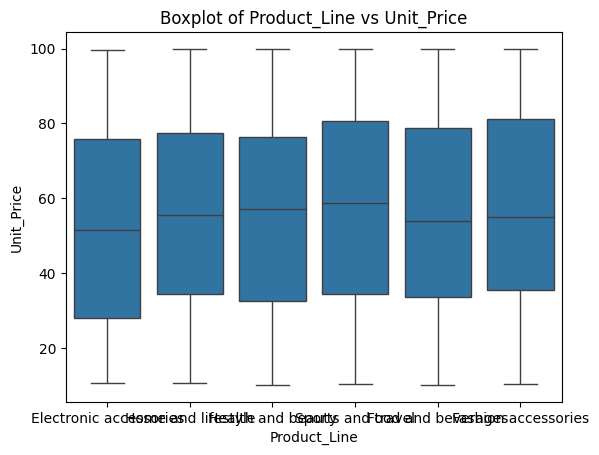

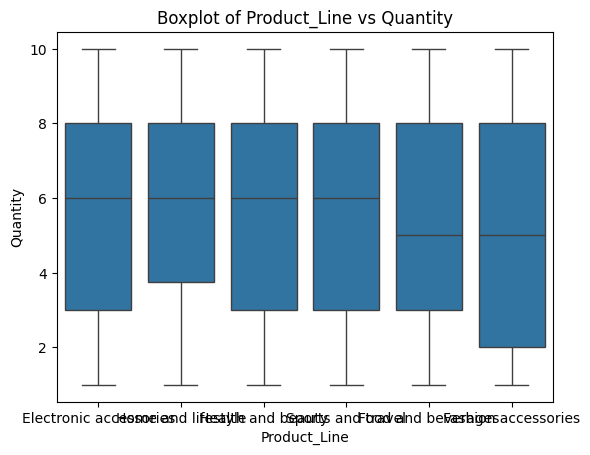

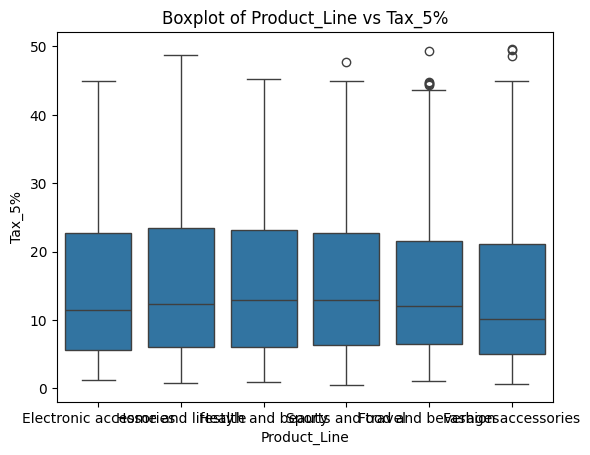

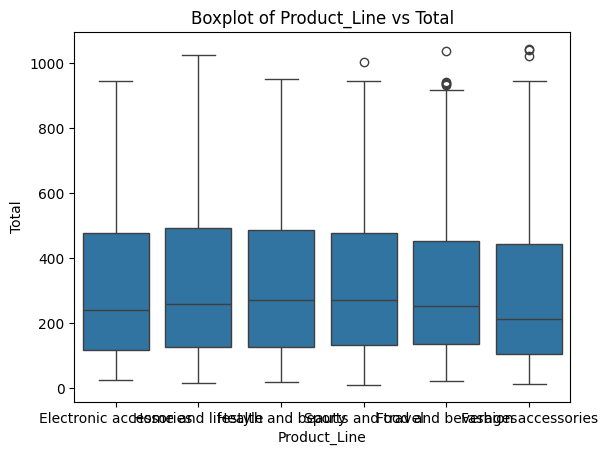

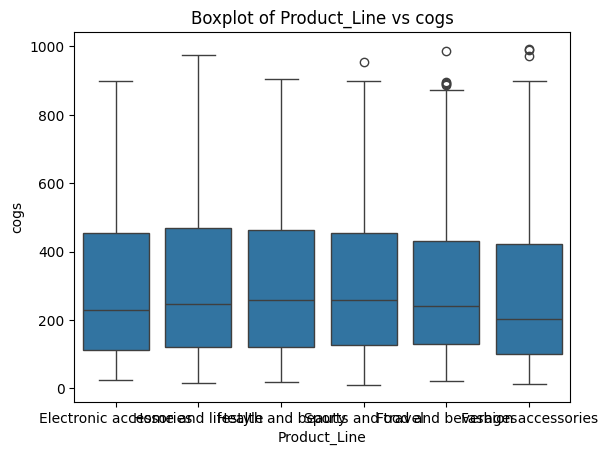

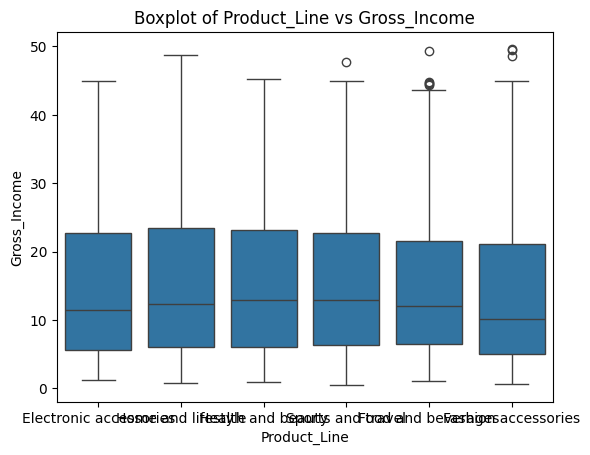

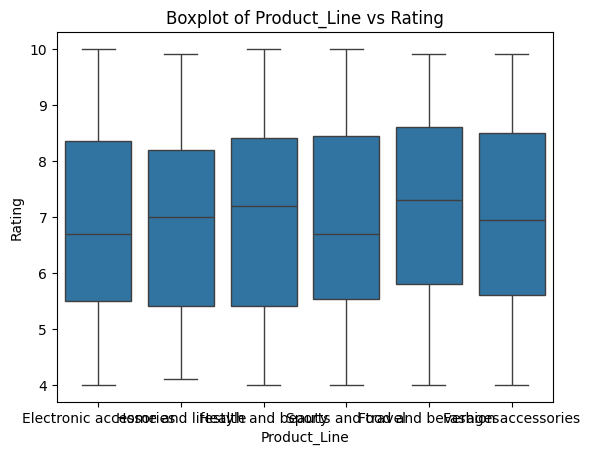

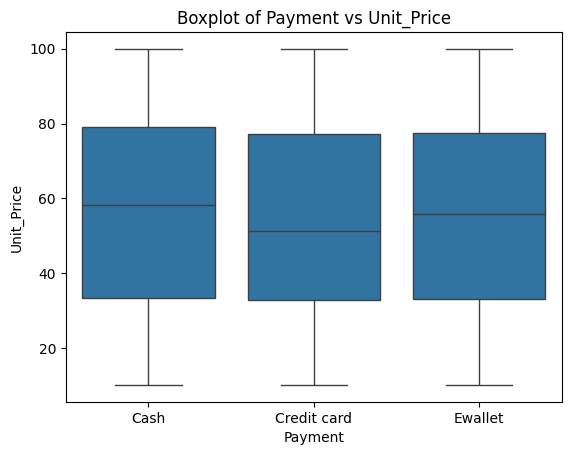

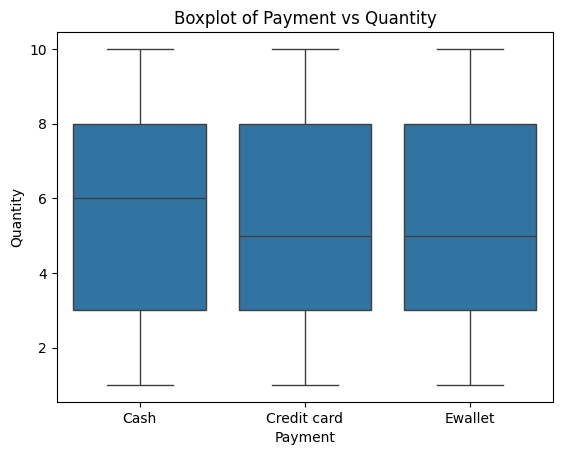

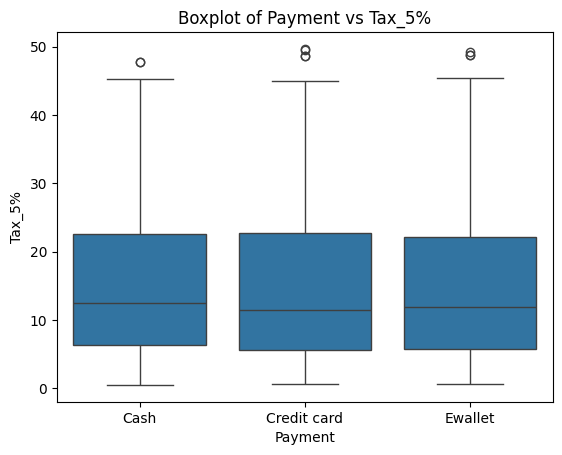

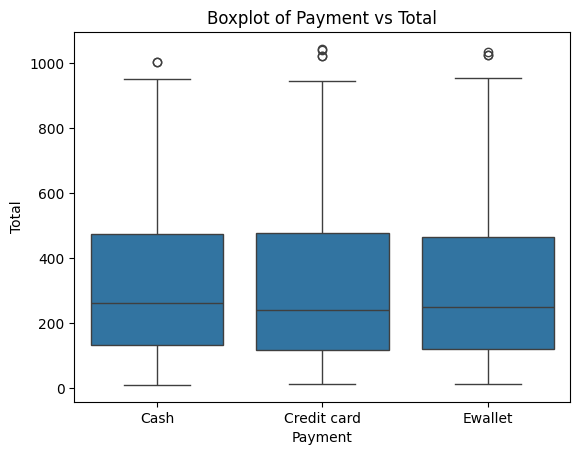

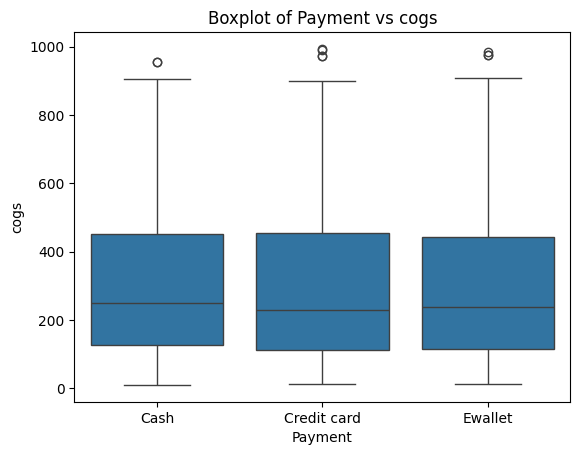

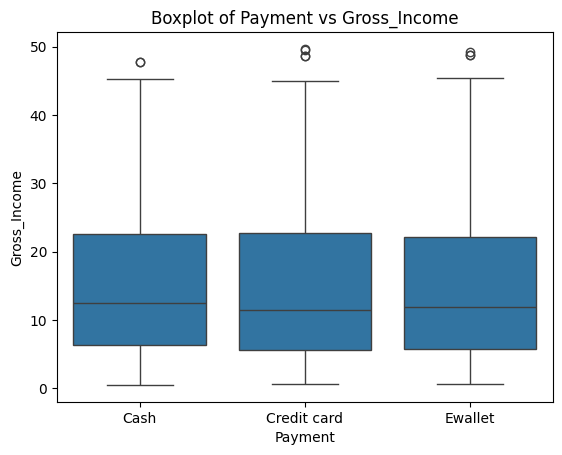

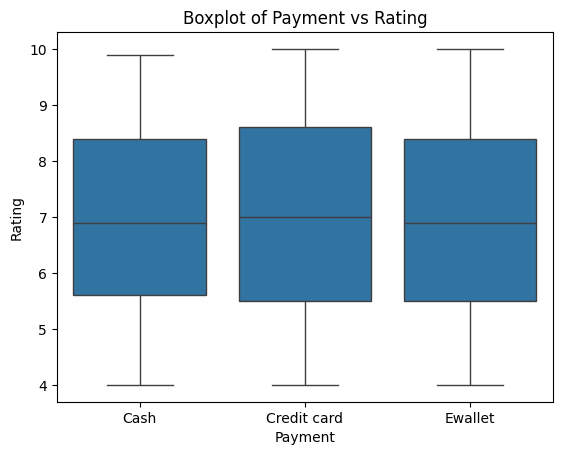

In [ ]:
for col1, col2 in pairs:
    bivariate_analysis(data, col1, col2)